In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from pylab import rcParams
%matplotlib inline
#sns.set(style = 'whitegrid', palette='muted', font_scale = 1.5)
#%config InlineBackend.figure_format = 'retina'
#rcParams['figure.figsize'] = 16,10

In [2]:
features, true_labels = make_blobs(n_samples = 10000, centers = 4, cluster_std = 3, random_state = 42)


In [3]:
features[:5]

array([[ -3.88816794,   5.77475878],
       [-11.31564798, -13.56913952],
       [  6.4811914 ,   3.09953726],
       [ -9.3886428 , -12.47945405],
       [ -4.77586027,  -4.71089862]])

In [4]:
true_labels[:5]

array([0, 2, 1, 2, 2])

In [5]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [6]:
features[:5]

array([[-0.0838072 ,  0.41935108],
       [-1.32569195, -2.383735  ],
       [ 1.64996377,  0.03169002],
       [-1.00349407, -2.22583083],
       [-0.23223057, -1.10010481]])

In [7]:
def model_inertias(features, max_cl=11):
    try_cl = range(1,max_cl)
    inertias = []
    
    for i in try_cl:
        kmeans = KMeans(init='random', n_clusters = i, n_init = 10, max_iter = 300, random_state = 42)
        kmeans.fit(features)
        inertia = kmeans.inertia_
        inertias.append(inertia)

    plt.plot(range(1,max_cl), inertias)
    plt.xticks(range(1,max_cl))
    plt.show()

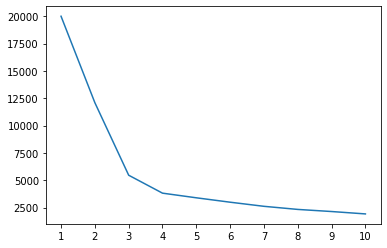

In [8]:
model_inertias(features)

In [9]:
def model_sscore(features, max_cl = 11):
    scores = []
    try_cl = range(2,max_cl)
    
    for i in try_cl:
        kmeans = KMeans(init='random', n_clusters = i, n_init = 10, max_iter = 300, random_state = 42)
        kmeans.fit(features)
        sil = silhouette_score(features, kmeans.labels_)
        scores.append(sil)
        
    plt.plot(range(2,max_cl), scores)
    plt.xticks(range(2,max_cl))
    plt.show()    

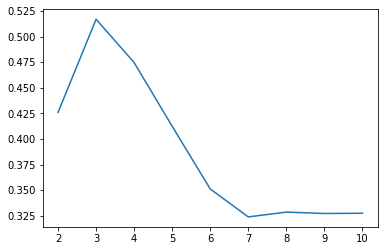

In [10]:
model_sscore(features)

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score


In [12]:
features1, true_labels1 = make_moons(n_samples = 10000, noise = 0.05, random_state = 42)

features1 = scaler.fit_transform(features1)

In [13]:
kmeans = KMeans(n_clusters = 2)
dbscan = DBSCAN(eps = 0.3) #This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

kmeans.fit(features1)
dbscan.fit(features1)

for alg in [kmeans, dbscan]:
    print(silhouette_score(features1, alg.labels_))
    

0.4981923818713519
0.3936607455754642


In [14]:
kmeans_sil = silhouette_score(features1, kmeans.labels_).round(2)
dbscan_sil = silhouette_score(features1, dbscan.labels_).round(2)

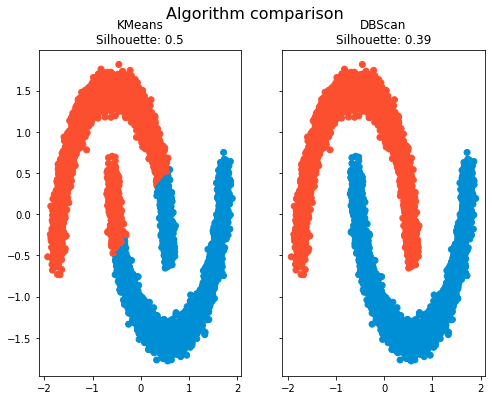

In [15]:
#plot the comparison

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,6), sharex = True, sharey = True)

fig.suptitle('Algorithm comparison', fontsize = 16)
fte_colors = {0: "#008fd5",
             1: "#fc4f30"}

#the plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(features1[:,0], features1[:, 1], c = km_colors)
ax1.set_title(f'KMeans\nSilhouette: {kmeans_sil}', fontdict = {'fontsize': 12})

db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(features1[:,0], features1[:, 1], c = db_colors)
ax2.set_title(f'DBScan\nSilhouette: {dbscan_sil}', fontdict = {'fontsize': 12})  

plt.show()

Since the ground truth labels are known, it’s possible to use a clustering metric that considers labels in its evaluation. You can use the scikit-learn implementation of a common metric called the adjusted rand index (ARI). Unlike the silhouette coefficient, the ARI uses true cluster assignments to measure the similarity between true and predicted labels.

Compare the clustering results of DBSCAN and k-means using ARI as the performance metric:

In [16]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels1, dbscan.labels_)

print(ari_kmeans, ari_dbscan)

-0.00012933370786447548 1.0


## CLUSTERING PIPELINE ON A REAL WORLD DATASET

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
import tarfile
import urllib

In [18]:
#uci_tcga_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00401/'
#archive_name = 'TCGA-PANCAN-HiSeq-801x20531.tar.gz'

#full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

#r = urllib.request.urlretrieve (full_download_url, archive_name)

#tar = tarfile.open(archive_name, 'r:gz')
#tar.extractall()
#tar.close()

The KMeans class in scikit-learn requires a NumPy array as an argument. The NumPy package has a helper function to load the data from the text file into memory as NumPy arrays:

In [19]:
datafile = 'TCGA-PANCAN-HiSeq-801x20531/data.csv'
labels_file = 'TCGA-PANCAN-HiSeq-801x20531/labels.csv'

data = np.genfromtxt(datafile, delimiter = ',', usecols = range(1, 20532), skip_header=1)

true_label_names = np.genfromtxt(labels_file, delimiter = ',', usecols=(1,), skip_header = 1, dtype = 'str')


In [20]:
data[:5, :3]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

In [21]:
true_label_names[:5]

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA'], dtype='<U4')

The data variable contains all the gene expression values from 20,531 genes. The true_label_names are the cancer types for each of the 881 samples. The first record in data corresponds with the first label in true_labels.

The labels are strings containing abbreviations of cancer types:

BRCA: Breast invasive carcinoma
COAD: Colon adenocarcinoma
KIRC: Kidney renal clear cell carcinoma
LUAD: Lung adenocarcinoma
PRAD: Prostate adenocarcinoma

In [22]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)

true_labels[:5]

array([4, 3, 4, 4, 0], dtype=int64)

In [23]:
label_encoder.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

In [24]:
n_clusters = len(label_encoder.classes_)

In practical machine learning pipelines, it’s common for the data to undergo multiple sequences of transformations before it feeds into a clustering algorithm. You learned about the importance of one of these transformation steps, feature scaling, earlier in this tutorial. An equally important data transformation technique is dimensionality reduction, which reduces the number of features in the dataset by either removing or combining them.

Dimensionality reduction techniques help to address a problem with machine learning algorithms known as the curse of dimensionality. In short, as the number of features increases, the feature space becomes sparse. This sparsity makes it difficult for algorithms to find data objects near one another in higher-dimensional space. Since the gene expression dataset has over 20,000 features, it qualifies as a great candidate for dimensionality reduction.

Principal Component Analysis (PCA) is one of many dimensionality reduction techniques. PCA transforms the input data by projecting it into a lower number of dimensions called components. The components capture the variability of the input data through a linear combination of the input data’s features.

You use MinMaxScaler when you do not assume that the shape of all your features follows a normal distribution.

In [25]:
#prep pipeline (scaling and pca)
preprocessor = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components = 2, random_state = 42))
])

In [26]:
clusterer = Pipeline([
    ('kmeans', KMeans(n_clusters = n_clusters, init = 'k-means++', n_init = 50, max_iter = 500, random_state = 42))
])

In [27]:
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('clusterer', clusterer)
])

In [28]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [29]:
preprocessed_data = pipe['preprocessor'].transform(data)
predicted_labels = pipe['clusterer']['kmeans'].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.5118775528450298

In [30]:
adjusted_rand_score(true_labels, predicted_labels)

0.722276752060253

In [37]:
label_encoder.inverse_transform([0,1,2,3,4])

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

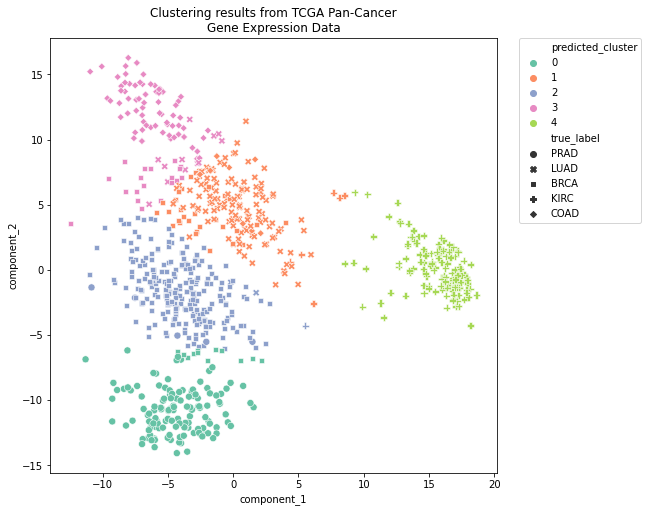

In [39]:
#dataframe based on PCA ['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD']
pcadf = pd.DataFrame(pipe['preprocessor'].transform(data), columns=['component_1','component_2'])
#adding predicted cluster column
pcadf['predicted_cluster'] = pipe['clusterer']['kmeans'].labels_
#adding true label column for comparison purposes
pcadf['true_label'] = label_encoder.inverse_transform(true_labels)
pcadf['predicted_label'] = pcadf['predicted_cluster'].map({0:'BRCA',1:'COAD',2:'KIRC',3:'LUAD',4:'PRAD'})
plt.figure(figsize = (8,8))
scat = sns.scatterplot(x='component_1',y='component_2',s=50,data=pcadf,
                       hue='predicted_cluster', style='true_label',
                       palette = 'Set2')

scat.set_title('Clustering results from TCGA Pan-Cancer\nGene Expression Data')
plt.legend(bbox_to_anchor = (1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

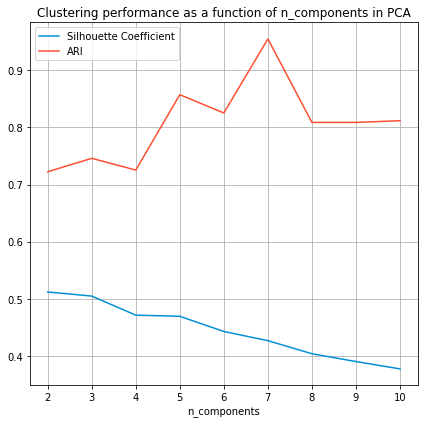

In [42]:
#MEASURING APPROPRIATE NUMBER OF PCA COMPONENTS
silhouette_scores = []
ari_scores = []

for n in range(2,11):
    pipe['preprocessor']['pca'].n_components = n
    pipe.fit(data)
    
    silhouette_coef = silhouette_score(pipe['preprocessor'].transform(data), pipe['clusterer']['kmeans'].labels_)
    ari = adjusted_rand_score(true_labels, pipe['clusterer']['kmeans'].labels_)
    
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

plt.figure(figsize=(6,6))
plt.plot(range(2,11),silhouette_scores, c='#008fd5',label='Silhouette Coefficient')
plt.plot(range(2,11),ari_scores, c='#fc4f30', label='ARI')

plt.xlabel('n_components')
plt.legend()
plt.title('Clustering performance as a function of n_components in PCA')
plt.tight_layout()
plt.grid()
plt.show()
        

The silhouette coefficient decreases linearly. The silhouette coefficient depends on the distance between points, so as the number of dimensions increases, the sparsity increases.

The ARI improves significantly as you add components. It appears to start tapering off after n_components=7, so that would be the value to use for presenting the best clustering results from this pipeline.